In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Osteoporosis Risk Prediction/osteoporosis.csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [ ]:
df.shape

(1958, 16)

In [ ]:
df.info

<bound method DataFrame.info of           Id  Age  Gender Hormonal Changes Family History    Race/Ethnicity  \
0     104866   69  Female           Normal            Yes             Asian   
1     101999   32  Female           Normal            Yes             Asian   
2     106567   89  Female   Postmenopausal             No         Caucasian   
3     102316   78  Female           Normal             No         Caucasian   
4     101944   38    Male   Postmenopausal            Yes  African American   
...      ...  ...     ...              ...            ...               ...   
1953  106130   19  Female           Normal            Yes  African American   
1954  106463   23  Female   Postmenopausal            Yes         Caucasian   
1955  103142   34  Female   Postmenopausal             No  African American   
1956  105187   25    Male   Postmenopausal             No  African American   
1957  108561   26  Female   Postmenopausal             No  African American   

      Body Weight Calcium Intake Vitamin D Intake Physical Activity Smoking  \
0     Underweight            Low       Sufficient         Sedentary     Yes   
1     Underweight            Low       Sufficient         Sedentary      No   
2          Normal       Adequate       Sufficient            Active      No   
3     Underweight       Adequate     Insufficient         Sedentary     Yes   
4          Normal            Low       Sufficient            Active     Yes   
...           ...            ...              ...               ...     ...   
1953       Normal       Adequate       Sufficient         Sedentary     Yes   
1954  Underweight            Low     Insufficient            Active      No   
1955  Underweight            Low       Sufficient         Sedentary      No   
1956       Normal            Low     Insufficient         Sedentary     Yes   
1957  Underweight       Adequate       Sufficient         Sedentary     Yes   

     Alcohol Consumption    Medical Conditions      Medications  \
0               Moderate  Rheumatoid Arthritis  Corticosteroids   
1                    NaN                   NaN              NaN   
2               Moderate       Hyperthyroidism  Corticosteroids   
3                    NaN  Rheumatoid Arthritis  Corticosteroids   
4                    NaN  Rheumatoid Arthritis              NaN   
...                  ...                   ...              ...   
1953            Moderate  Rheumatoid Arthritis              NaN   
1954                 NaN                   NaN  Corticosteroids   
1955                 NaN       Hyperthyroidism              NaN   
1956                 NaN  Rheumatoid Arthritis  Corticosteroids   
1957                 NaN  Rheumatoid Arthritis  Corticosteroids   

     Prior Fractures  Osteoporosis  
0                Yes             1  
1                Yes             1  
2                 No             1  
3                 No             1  
4                Yes             1  
...              ...           ...  
1953             Yes             0  
1954              No             0  
1955              No             0  
1956             Yes             0  
1957              No             0  

[1958 rows x 16 columns]>

In [ ]:
colums_with_missing_values = df.columns[df.isnull().any()]

print('Missing values percentage ')
for columns in colums_with_missing_values:
    print(columns,':',df[columns].isnull().sum()/df.shape[0]*100)

Missing values percentage 
Alcohol Consumption : 50.45965270684371
Medical Conditions : 33.04392236976506
Medications : 50.30643513789581


In [ ]:
df.fillna('None',inplace=True)

In [ ]:
df = df.drop(['Id'], axis=1)

In [ ]:
categorical_colums = df.select_dtypes(include=['object']).columns
for columns in categorical_colums:
    print(df[columns].value_counts())

Gender
Male      992
Female    966
Name: count, dtype: int64
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64
Family History
No     998
Yes    960
Name: count, dtype: int64
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64
Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64
Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64
Smoking
Yes    982
No     976
Name: count, dtype: int64
Alcohol Consumption
None        988
Moderate    970
Name: count, dtype: int64
Medical Conditions
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64
Medications
None               985
Corticosteroids    973
Name: count, dtype: int64
Prior Fract

In [ ]:
df.describe()

,Age,Osteoporosis
count,1958.000000,1958.000000
mean,39.101124,0.500000
std,21.355424,0.500128
min,18.000000,0.000000
25%,21.000000,0.000000
50%,32.000000,0.500000
75%,53.000000,1.000000
max,90.000000,1.000000


In [ ]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


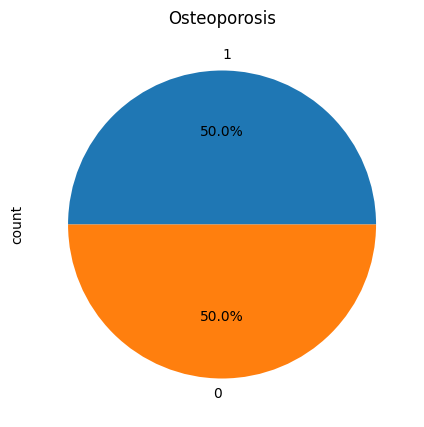

In [ ]:
plt.figure(figsize=(5,5))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis');

Text(0, 0.5, 'Osteoporosis by Age')

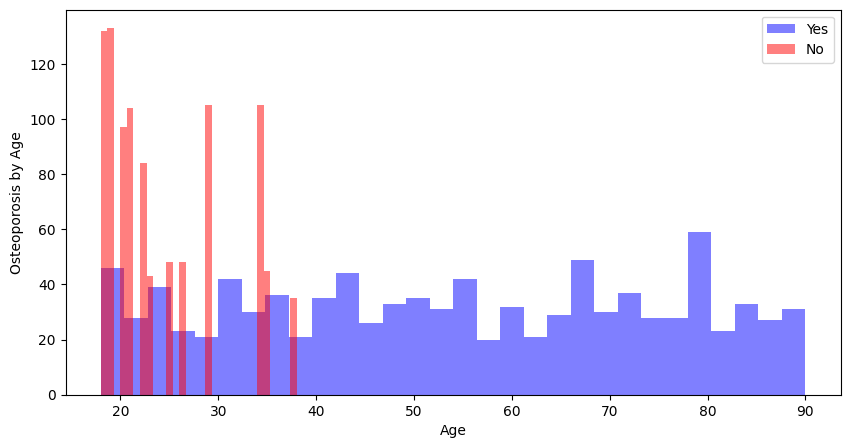

In [ ]:
plt.figure(figsize=(10,5))
df[df['Osteoporosis']==1]['Age'].plot.hist(bins=30, alpha=0.5, color='blue', label='Yes')
df[df['Osteoporosis']==0]['Age'].plot.hist(bins=30, alpha=0.5, color='red', label='No')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Osteoporosis by Age')

Text(0.5, 1.0, 'Gender vs Osteoporosis')

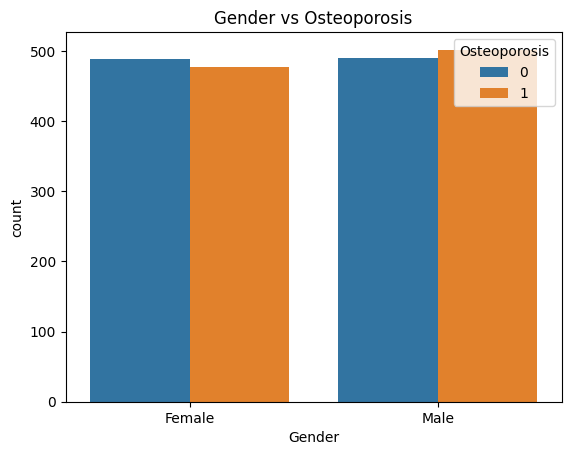

In [ ]:
sns.countplot(x='Gender', data=df, hue='Osteoporosis').set_title('Gender vs Osteoporosis')

Text(0.5, 1.0, 'Hormonal Changes vs Osteoporosis')

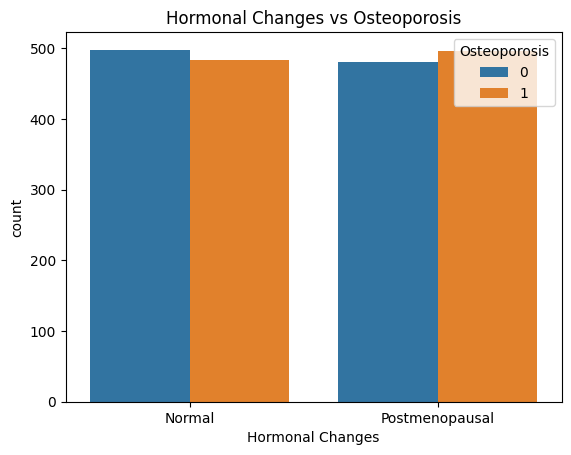

In [ ]:
sns.countplot(x='Hormonal Changes', data=df, hue='Osteoporosis').set_title('Hormonal Changes vs Osteoporosis')

Text(0.5, 1.0, 'Family History vs Osteoporosis')

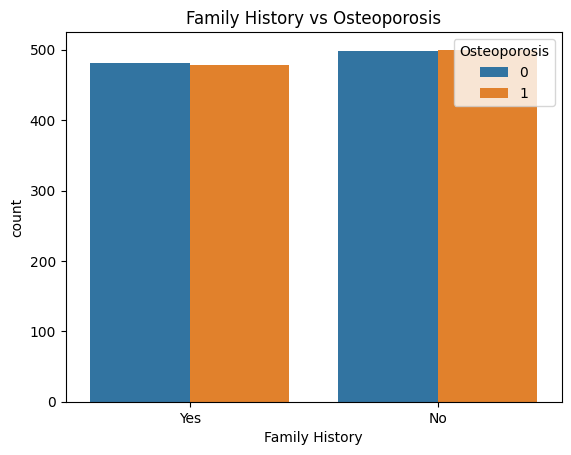

In [ ]:
sns.countplot(x='Family History', data=df, hue='Osteoporosis').set_title('Family History vs Osteoporosis')

Text(0.5, 1.0, 'Race/Ethnicity vs Osteoporosis')

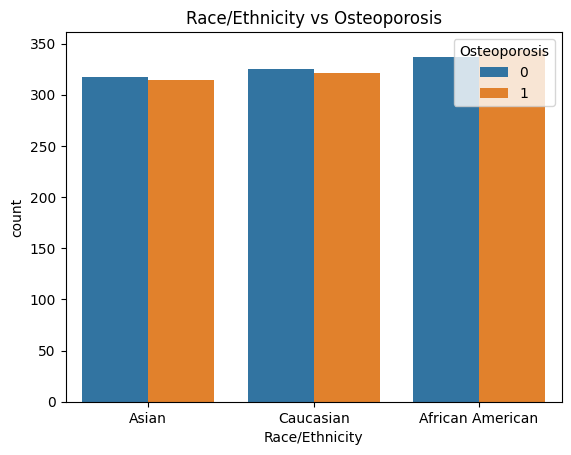

In [ ]:
sns.countplot(x='Race/Ethnicity', data=df, hue='Osteoporosis').set_title('Race/Ethnicity vs Osteoporosis')

Text(0.5, 1.0, 'Body Weighty vs Osteoporosis')

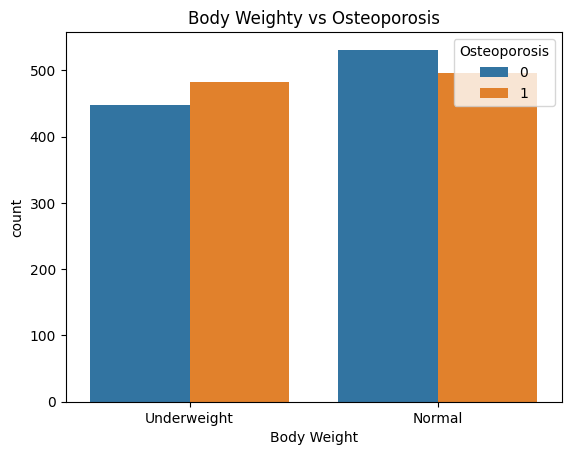

In [ ]:
sns.countplot(x='Body Weight', data=df, hue='Osteoporosis').set_title('Body Weighty vs Osteoporosis')

Text(0.5, 1.0, 'Vitamin D Intake and Osteoporosis')

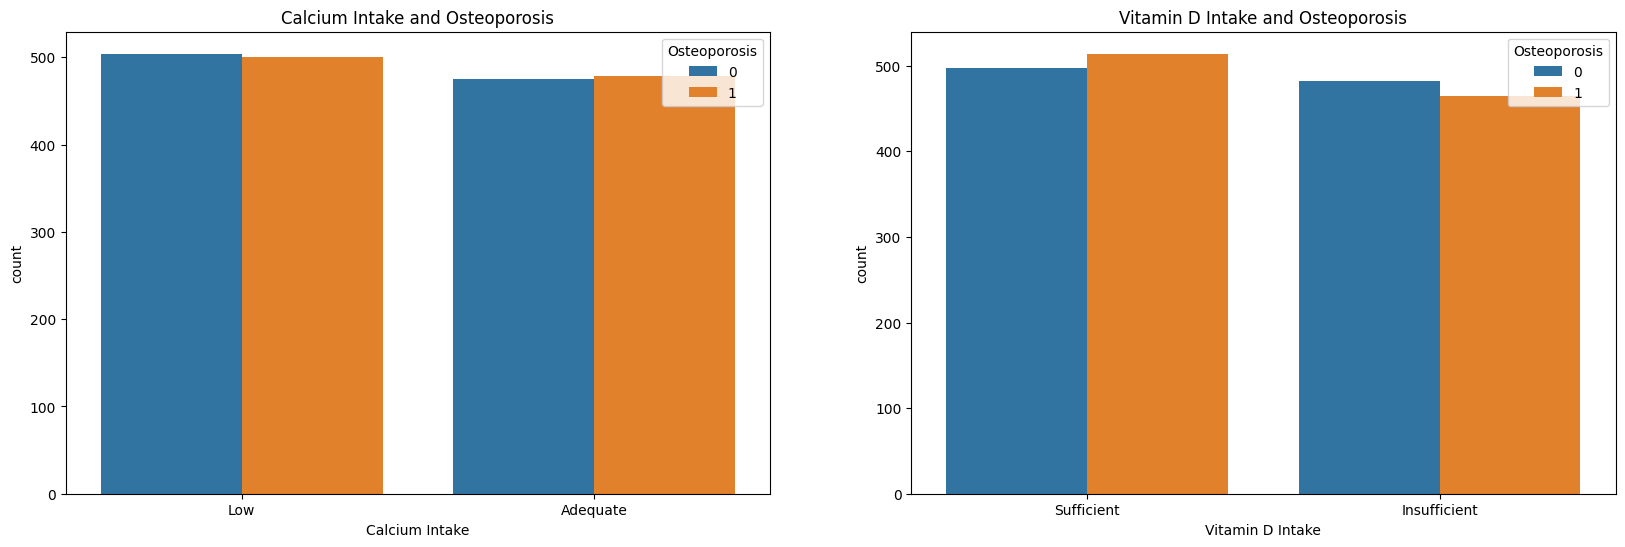

In [ ]:
fig,ax =plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='Calcium Intake', data=df , ax=ax[0], hue='Osteoporosis').set_title('Calcium Intake and Osteoporosis')
sns.countplot(x='Vitamin D Intake', data=df , ax=ax[1], hue='Osteoporosis').set_title('Vitamin D Intake and Osteoporosis')

Text(0.5, 1.0, 'Physical Activity vs Osteoporosis')

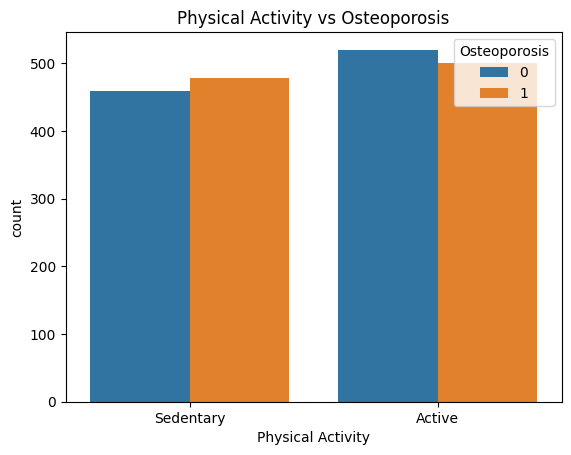

In [ ]:
sns.countplot(x='Physical Activity', data=df, hue='Osteoporosis').set_title('Physical Activity vs Osteoporosis')

Text(0.5, 1.0, 'Alcohol Consumption and Osteoporosis')

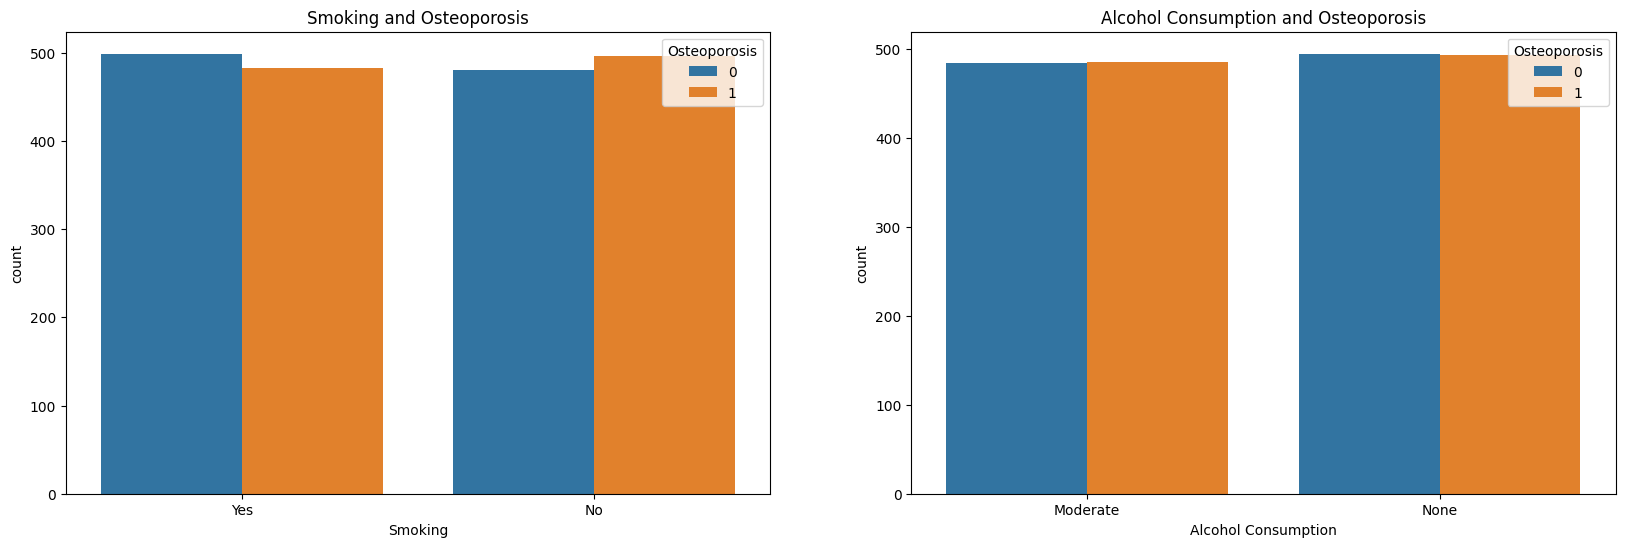

In [ ]:
fig,ax =plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='Smoking', data=df , ax=ax[0], hue='Osteoporosis').set_title('Smoking and Osteoporosis')
sns.countplot(x='Alcohol Consumption', data=df , ax=ax[1], hue='Osteoporosis').set_title('Alcohol Consumption and Osteoporosis')

Text(0.5, 1.0, 'Medications  and Osteoporosis')

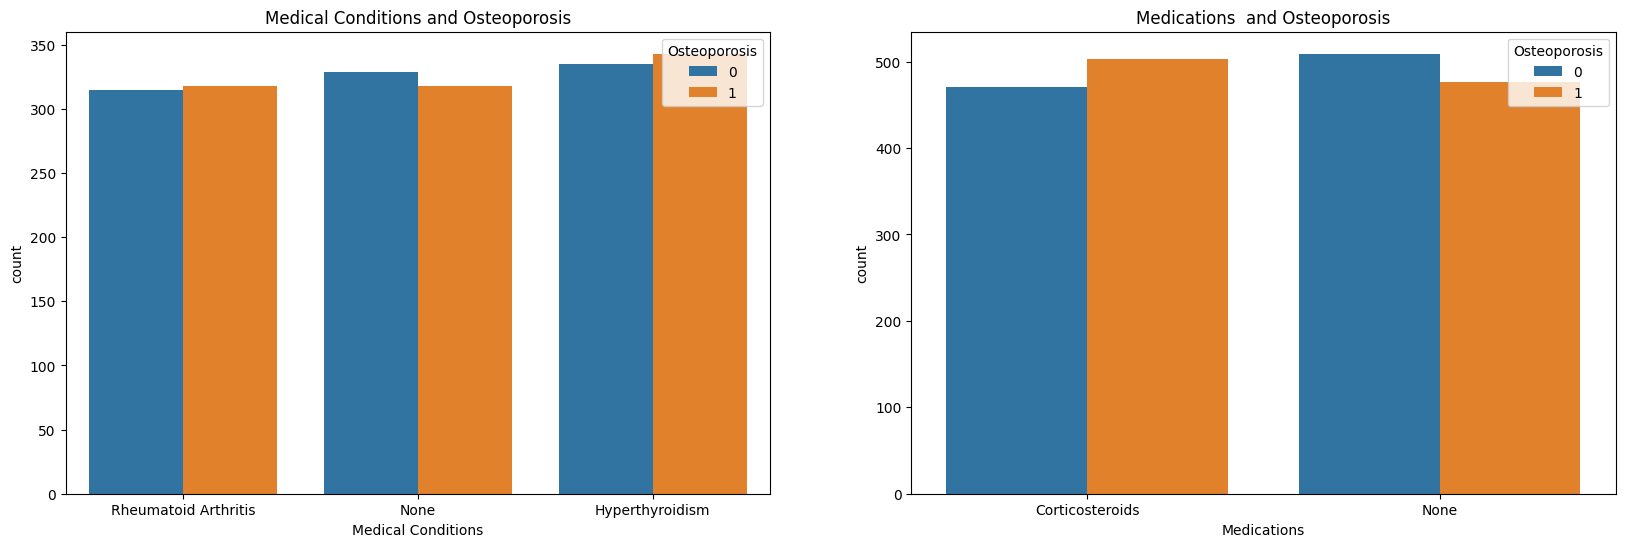

In [ ]:
fig,ax =plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='Medical Conditions', data=df , ax=ax[0], hue='Osteoporosis').set_title('Medical Conditions and Osteoporosis')
sns.countplot(x='Medications', data=df , ax=ax[1], hue='Osteoporosis').set_title('Medications  and Osteoporosis')

Text(0.5, 1.0, 'Prior Fractures \t vs Osteoporosis')

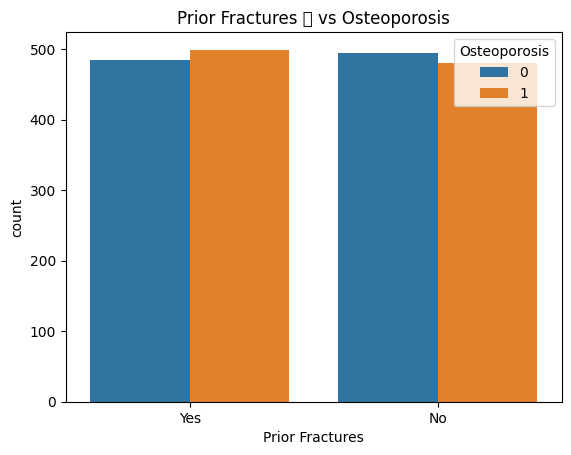

In [ ]:
sns.countplot(x='Prior Fractures', data=df, hue='Osteoporosis').set_title('Prior Fractures 	 vs Osteoporosis')

In [ ]:
cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    print(col,':',df[col].unique())

Gender : [0 1]
Hormonal Changes : [0 1]
Family History : [1 0]
Race/Ethnicity : [1 2 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [0 1]
Medical Conditions : [2 1 0]
Medications : [0 1]
Prior Fractures : [1 0]


<Axes: >

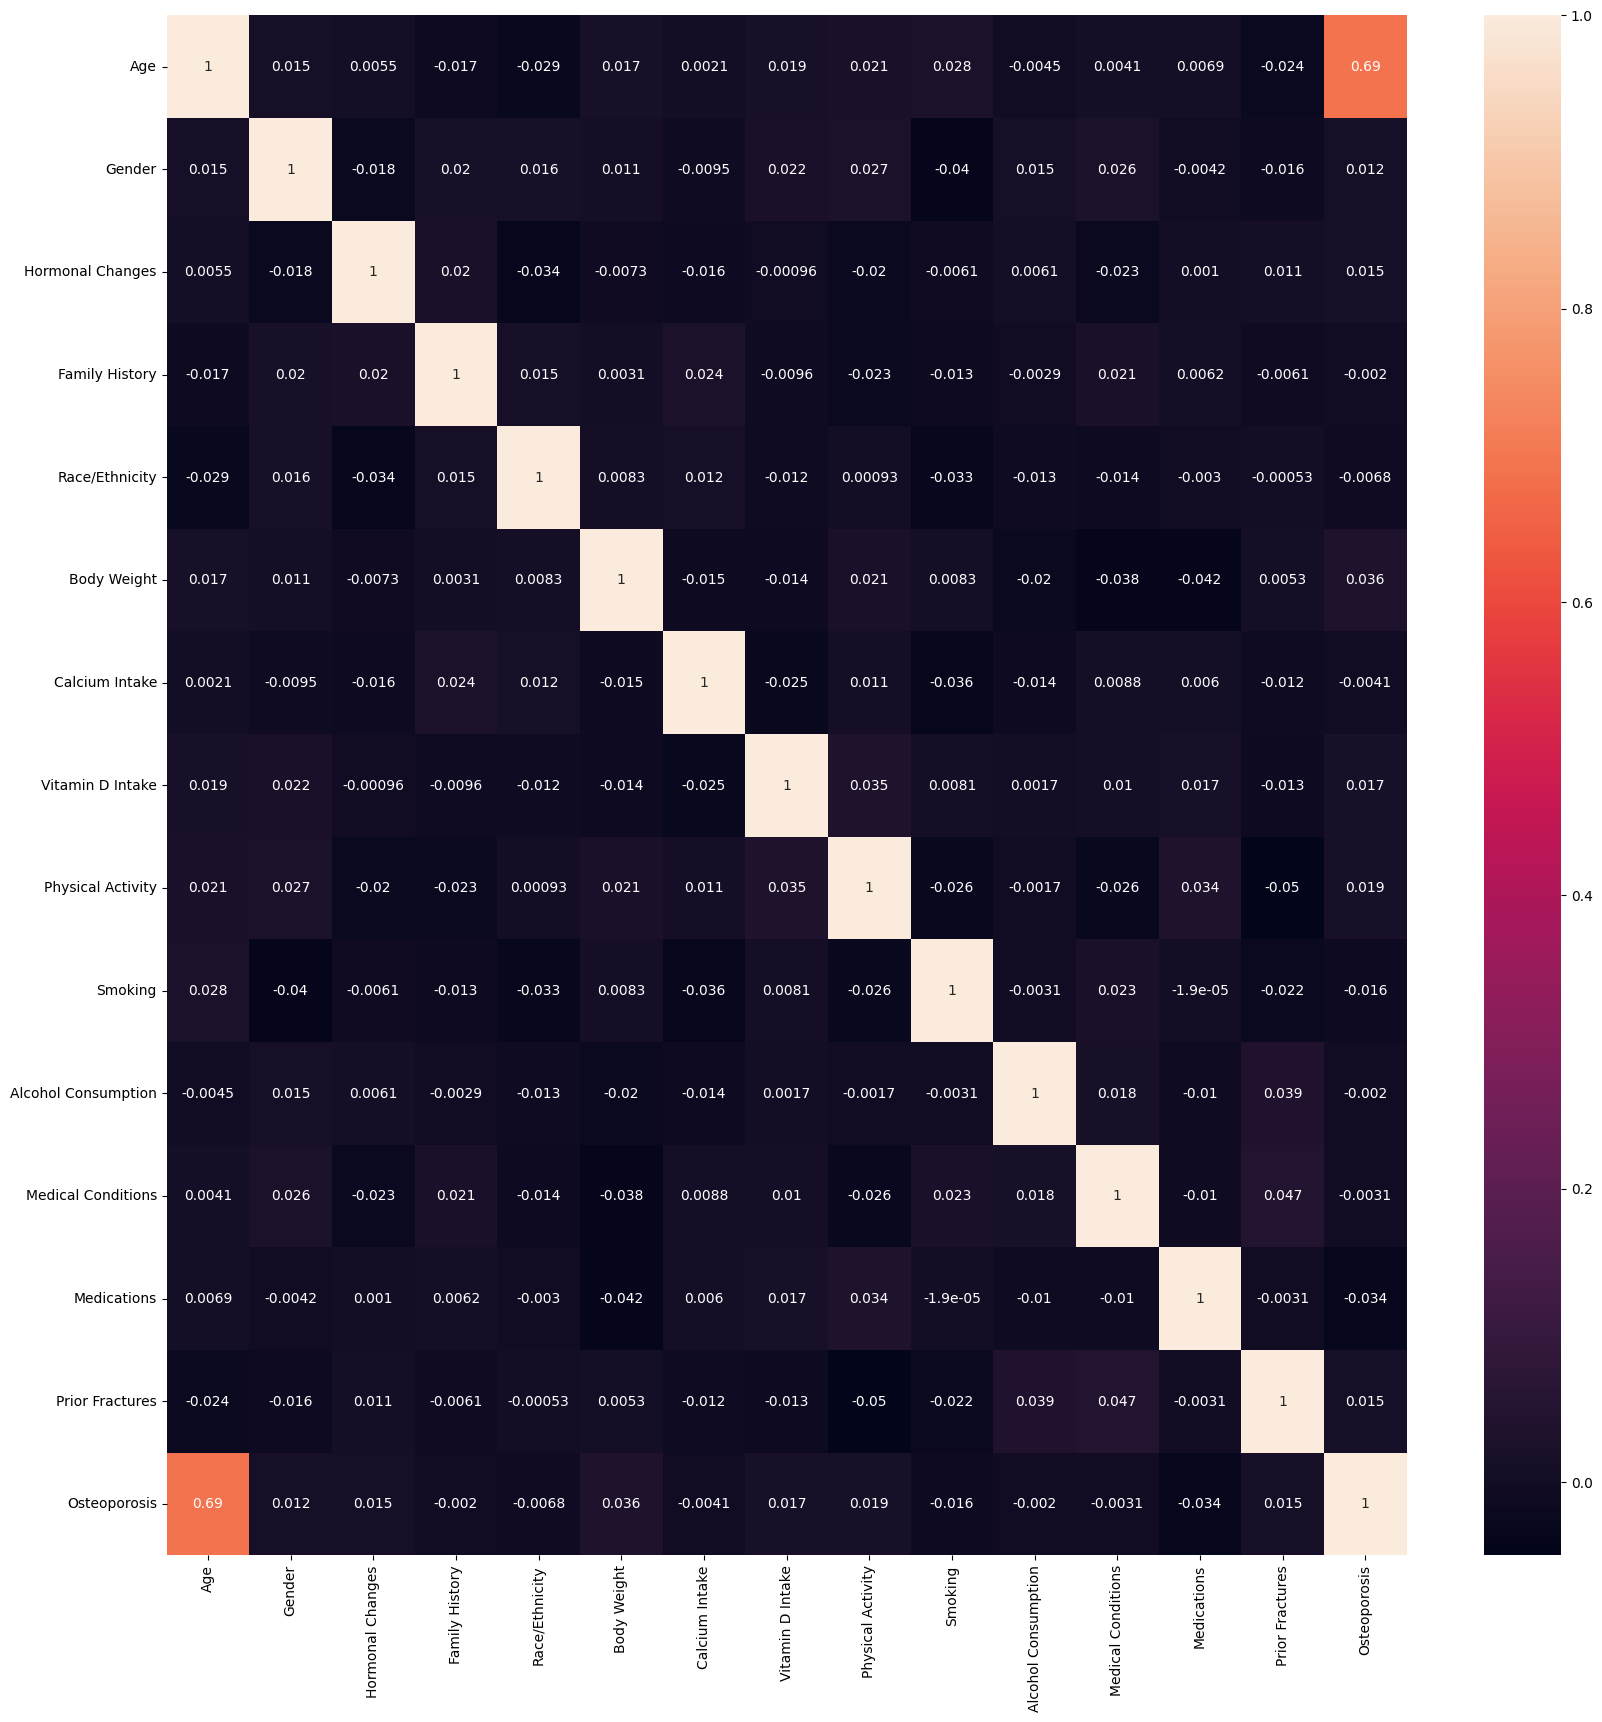

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.drop(columns='Osteoporosis', axis=1)
y = df['Osteoporosis']
X_train , X_test , y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)
X_train , X_val ,y_train , y_val = train_test_split(X_train, y_train , test_size=0.2 , random_state=42)

In [ ]:
logestic_model= LogisticRegression()
logestic_model.fit(X_train, y_train)

X_train_predict = logestic_model.predict(X_train)

training = accuracy_score(y_train, X_train_predict)

print(training)

0.8274760383386581


In [ ]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model_rand = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model_rand,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 100}
best cross-validated accuracy:  0.8498454183266932


In [ ]:
model_rand = RandomForestClassifier(criterion='gini',n_estimators=250 , random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=2)
model_rand.fit(X_train,y_train)
y_perd = model_rand.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)
precision = precision_score(y_test,y_perd)
recall = recall_score(y_test,y_perd)
f1 = f1_score(y_test,y_perd)
score = model_rand.score(X_train,y_train)
print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.84%
precision :  0.95%
recall :  0.73%
F1 score :  0.82%
score :  0.95%


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.81%
Precision :  0.81%
Recall :  0.81%
F1 score :  0.81%
score :  0.84%


In [ ]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 200}
best cross-validated accuracy:  0.9105466135458167


In [ ]:
model = AdaBoostClassifier(n_estimators=200, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.91%
Precision :  0.92%
Recall :  0.91%
F1 score :  0.91%
score :  0.91%


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(n_estimators=300, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Learning rate set to 0.034205
0:	learn: 0.6559734	total: 48.9ms	remaining: 14.6s
1:	learn: 0.6326606	total: 50.7ms	remaining: 7.55s
2:	learn: 0.6090013	total: 52.6ms	remaining: 5.2s
3:	learn: 0.5879672	total: 54.2ms	remaining: 4.01s
4:	learn: 0.5617348	total: 55.6ms	remaining: 3.28s
5:	learn: 0.5430878	total: 57.3ms	remaining: 2.81s
6:	learn: 0.5224868	total: 58.9ms	remaining: 2.47s
7:	learn: 0.5010503	total: 60.7ms	remaining: 2.22s
8:	learn: 0.4851552	total: 62.6ms	remaining: 2.02s
9:	learn: 0.4692434	total: 64.4ms	remaining: 1.87s
10:	learn: 0.4540539	total: 66.2ms	remaining: 1.74s
11:	learn: 0.4415399	total: 68ms	remaining: 1.63s
12:	learn: 0.4309700	total: 69.7ms	remaining: 1.54s
13:	learn: 0.4192049	total: 71.5ms	remaining: 1.46s
14:	learn: 0.4079916	total: 72.6ms	remaining: 1.38s
15:	learn: 0.3995515	total: 73.8ms	remaining: 1.31s
16:	learn: 0.3901462	total: 75.5ms	remaining: 1.26s
17:	learn: 0.3798363	total: 77.5ms	remaining: 1.21s
18:	learn: 0.3744874	total: 79.1ms	remaining: 1

In [ ]:
from xgboost import XGBClassifier

param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model_rand = XGBClassifier(random_state=42)
grid_search = GridSearchCV(model_rand,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 350}
best cross-validated accuracy:  0.882584860557769


In [ ]:
model = XGBClassifier(n_estimators=350, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.87%
Precision :  0.87%
Recall :  0.87%
F1 score :  0.87%
score :  1.00%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model_rand = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(model_rand,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 100}
best cross-validated accuracy:  0.9057561752988048


In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train, y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.90%
Precision :  0.91%
Recall :  0.90%
F1 score :  0.90%
score :  0.92%


In [ ]:
from lightgbm import LGBMClassifier

param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model_rand = LGBMClassifier(random_state=42)
grid_search = GridSearchCV(model_rand,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 492, number of negative: 509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1001, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491508 -> initscore=-0.033969
[LightGBM] [Info] Start training from score -0.033969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
model = LGBMClassifier(n_estimators=100,  random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train, y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 616, number of negative: 636
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 1252, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492013 -> initscore=-0.031952
[LightGBM] [Info] Start training from score -0.031952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy :  0.89%
Precision :  0.89%
Recall :  0.89%
F1 score :  0.88%
score :  0.99%


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 616, number of negative: 636
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 1252, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492013 -> initscore=-0.031952
[LightGBM] [Info] Start training from score -0.031952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


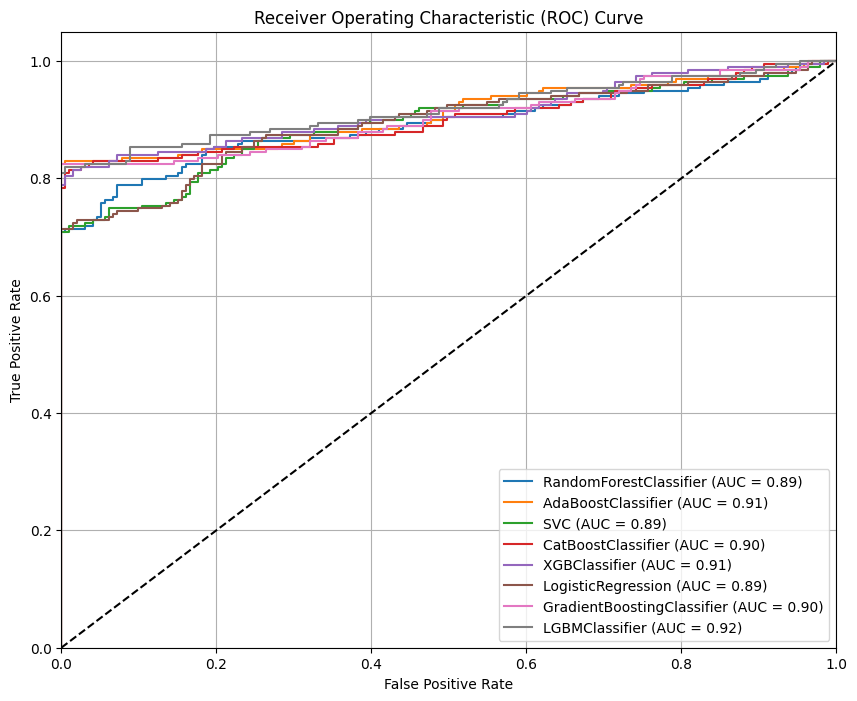

In [ ]:
from sklearn.metrics import roc_curve, auc

models = [
    RandomForestClassifier(criterion='gini',n_estimators=250 , random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=2),
    AdaBoostClassifier(n_estimators=200, random_state=42),
    SVC(kernel='linear', probability=True, random_state=42),
    CatBoostClassifier(n_estimators=300, random_state=42, verbose=False),
    XGBClassifier(n_estimators=350, random_state=42),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    LGBMClassifier(n_estimators=100,  random_state=42)


]
# Plot ROC curve for each model

plt.figure(figsize=(10, 8))
for model in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (type(model).__name__, roc_auc))

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show();

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l1_l2

# Assuming X and y are your feature and target matrices

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define advanced neural network architecture
model = Sequential([
    Dense(512, input_dim=X_train_scaled.shape[1]),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(256, kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(128, kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(64, kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Define custom learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.9
    return lr

# Compile the model with Adam optimizer and custom learning rate scheduler
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping and learning rate scheduler callbacks
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping, lr_scheduler_callback], verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch 1/100
20/20 [==============================] - 6s 56ms/step - loss: 9.2864 - accuracy: 0.7372 - val_loss: 8.7741 - val_accuracy: 0.8248 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 1s 33ms/step - loss: 8.1254 - accuracy: 0.8235 - val_loss: 7.6321 - val_accuracy: 0.8344 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 1s 27ms/step - loss: 7.0032 - accuracy: 0.8171 - val_loss: 6.5474 - val_accuracy: 0.8312 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - 0s 23ms/step - loss: 5.9301 - accuracy: 0.8395 - val_loss: 5.5522 - val_accuracy: 0.8312 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 0s 24ms/step - loss: 4.9658 - accuracy: 0.8474 - val_loss: 4.6690 - val_accuracy: 0.8185 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - 1s 26ms/step - loss: 4.1496 - accuracy: 0.8522 - val_loss: 3.9271 - val_accuracy: 0.7898 - lr: 0.0010
Epoch 7/100
20/20 [==============================] - 0s 23ms/step - lo

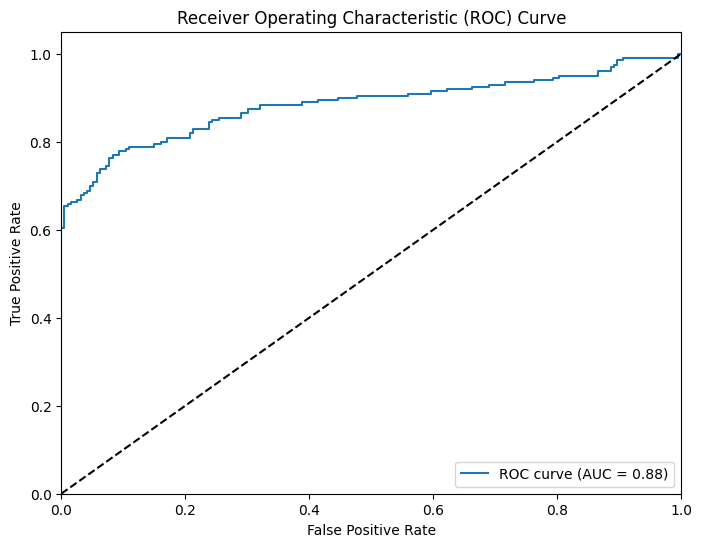

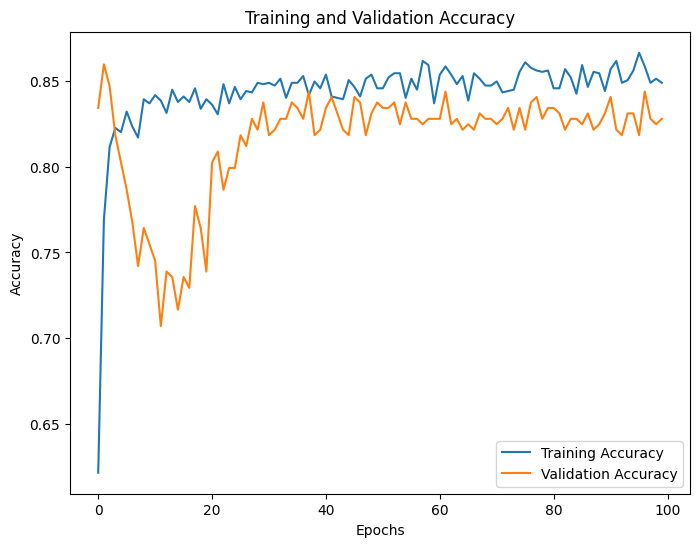

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import legacy

# Assuming X and y are defined as your input features and target variable

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define advanced neural network architecture
def create_model(optimizer=legacy.Adam(), dropout_rate=0.2, l1_reg=0.01, l2_reg=0.01):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled.shape[1], kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.9
    return lr

# Hyperparameter tuning with k-fold cross-validation
param_grid = {'optimizer': [legacy.Adam(), legacy.RMSprop()], 'dropout_rate': [0.2, 0.3, 0.4], 'l1_reg': [0.01, 0.001], 'l2_reg': [0.01, 0.001]}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_scores = []
best_models = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_kf, X_val_kf = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    models = []
    scores = []

    for params in ParameterGrid(param_grid):
        model = create_model(**params)
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler_callback = LearningRateScheduler(lr_scheduler)
        history = model.fit(X_train_kf, y_train_kf, epochs=100, validation_data=(X_val_kf, y_val_kf), callbacks=[early_stopping, lr_scheduler_callback], verbose=0)
        scores.append(max(history.history['val_accuracy']))
        models.append(model)

    best_model_index = np.argmax(scores)
    best_models.append(models[best_model_index])
    best_scores.append(scores[best_model_index])

best_model_index = np.argmax(best_scores)
best_model = best_models[best_model_index]
print('Best model index:', best_model_index)

# Evaluate the best model
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Best model index: 0
13/13 [==============================] - 0s 3ms/step
Accuracy: 0.8418
Precision: 0.9536
Recall: 0.7236
F1 Score: 0.8229
